# rasterio: biblioteca para lectura, escritura y análisis de datos raster

[![Abrir en Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gf0657-programacionsig/2024-ii/blob/main/contenido/4/rasterio.ipynb)

## Introducción

[rasterio](https://rasterio.readthedocs.io/) es una biblioteca de Python que permite leer, escribir y analizar datos raster. Construida sobre [GDAL](https://gdal.org) (Geospatial Data Abstraction Library), proporciona una interfaz para trabajar con imágenes satelitales, modelos digitales de elevación (DEM) y otros tipos de datos raster.

## Instalación

### En ambientes locales (ej. conda)

Se recomienda actualizar primero conda y mamba.

```bash
# Actualizar conda y mamba
conda update conda
conda update -c conda-forge mamba
```

rasterio puede instalarse con `pip`, `conda` o `mamba`, desde la línea de comandos del sistema operativo. Solo es necesario hacerlo de una forma. Se recomienda instalarla junto con el paquete fiona (para leer y escribir archivos geoespaciales).

```bash
# Instalar rasterio y sus bibliotecas asociadas con pip
pip install rasterio fiona

# Instalar rasterio y sus bibliotecas asociadas con conda
conda install -c conda-forge rasterio fiona

# Instalar rasterio y sus bibliotecas asociadas con mamba
mamba install -c conda-forge rasterio fiona
```

### En la nube (ej. Google Colab)

```bash
# Con pip
pip install rasterio fiona
```

## Carga

In [1]:
# Carga de rasterio
import rasterio

# Módulo de rasterio para graficar datos raster
import rasterio.plot

# Biblioteca para datos geoespaciales vectoriales
import geopandas as gpd

# Biblioteca para álgebra lineal
import numpy as np

# Biblioteca de graficación
import matplotlib.pyplot as plt

## Operaciones básicas

### Lectura de datos

La función [`rasterio.open()`](https://rasterio.readthedocs.io/en/stable/api/rasterio.html#rasterio.open) abre un conjunto de datos raster para lectura o escritura. 

En el siguiente bloque de código, se carga un conjunto de datos raster correspondiente a la altitud de Costa Rica, proveniente del sitio [WorldClim](https://www.worldclim.org/) de información climática.

In [2]:
# Lectura de datos de altitud
altitud = rasterio.open(
    'https://github.com/gf0657-programacionsig/2024-ii/raw/refs/heads/main/datos/worldclim/altitud.tif'
)

print(altitud)

<open DatasetReader name='https://github.com/gf0657-programacionsig/2024-ii/raw/refs/heads/main/datos/worldclim/altitud.tif' mode='r'>


En el bloque de código anterior, `rasterio.open()` retorna un objeto de la clase `DatasetReader`, el cual permite interactuar con un archivo raster. El objeto `altitud` no almacena el contenido del archivo GeoTIFF, solamente un "puntero" a su ubicación.

### Consulta de propiedades y metadatos

Una vez que un conjunto de datos ha sido abierto, pueden recuperarse propiedades y metadatos como su CRS, resolución, límites, bandas y tipo de datos.

In [3]:
# Nombre de la fuente de datos
altitud.name

'https://github.com/gf0657-programacionsig/2024-ii/raw/refs/heads/main/datos/worldclim/altitud.tif'

In [4]:
# Modo de apertura de la fuente de datos
# (ej. r = lectura, w = escritura)
altitud.mode

'r'

In [5]:
# CRS
altitud.crs

CRS.from_epsg(4326)

In [6]:
# Resolución (tamaño de cada celda)
altitud.res

(0.008333333333333316, 0.008333333333333337)

In [7]:
# Límites
altitud.bounds

BoundingBox(left=-87.1, bottom=5.5, right=-82.55833333333334, top=11.216666666666669)

In [8]:
# Metadatos
altitud.meta

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': -32768.0,
 'width': 545,
 'height': 686,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.008333333333333316, 0.0, -87.1,
        0.0, -0.008333333333333337, 11.216666666666669)}

### Graficación

La función [`rasterio.plot.show()`](https://rasterio.readthedocs.io/en/stable/api/rasterio.plot.html#rasterio.plot.show) despliega un raster o una banda de un raster.

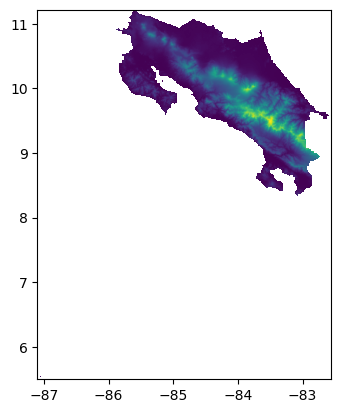

<Axes: >

In [9]:
# Mapa de altitud
rasterio.plot.show(altitud)

El mapa anterior se puede personalizar con diversas opciones de la interfaz `Axes` de matplotlib.

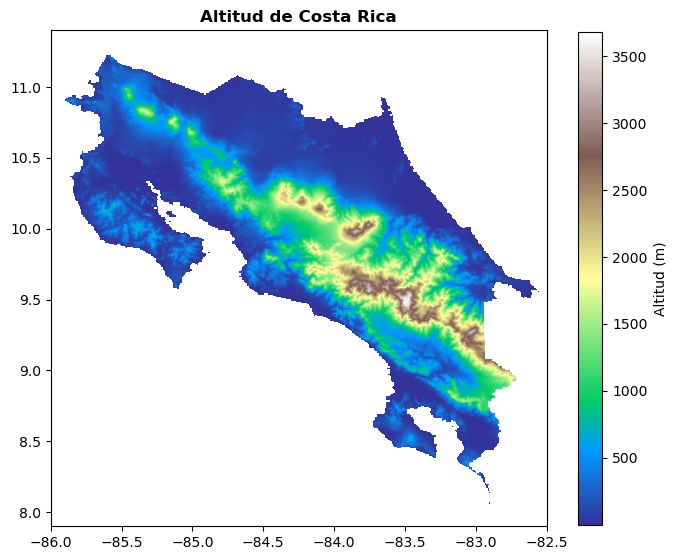

In [10]:
fig, ax = plt.subplots(figsize=(8, 8))

# Mapa de altitud
rasterio.plot.show(
    altitud, 
    cmap="terrain", # colores
    ax=ax, 
    title="Altitud de Costa Rica"
)

# Agregar una leyenda
cbar = fig.colorbar(ax.images[0], ax=ax, shrink=0.8)
cbar.set_label('Altitud (m)')

# Limitar el rango de los ejes
ax.set_xlim(-86.0, -82.5)
ax.set_ylim(7.9, 11.4)

plt.show()

La lista completa de paletas de colores de matplotlib puede consultarse en [Colormap reference -- matplotlib documentation](https://matplotlib.org/stable/gallery/color/colormap_reference.html).

**Ejercicios**

1. Programe mapas para las siguientes capas raster:

    - Temperatura promedio anual entre 1970 y 2000: [https://github.com/gf0657-programacionsig/2024-ii/raw/refs/heads/main/datos/worldclim/temperatura.tif](https://github.com/gf0657-programacionsig/2024-ii/raw/refs/heads/main/datos/worldclim/temperatura.tif)
    - Precipitación anual entre 1970 y 2000: [https://github.com/gf0657-programacionsig/2024-ii/raw/refs/heads/main/datos/worldclim/precipitacion.tif](https://github.com/gf0657-programacionsig/2024-ii/raw/refs/heads/main/datos/worldclim/precipitacion.tif)

## Manejo de múltiples bandas

In [11]:
# Lectura de imagen Sentinel
imagen = rasterio.open(
    'https://github.com/gf0657-programacionsig/2024-ii/raw/refs/heads/main/datos/sentinel/gandoca-20240105.tif'
)
print(imagen)

<open DatasetReader name='https://github.com/gf0657-programacionsig/2024-ii/raw/refs/heads/main/datos/sentinel/gandoca-20240105.tif' mode='r'>


In [12]:
# Metadatos
imagen.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 128,
 'height': 154,
 'count': 7,
 'crs': CRS.from_epsg(8857),
 'transform': Affine(10.0, 0.0, -7868055.0,
        0.0, -10.0, 1235575.0)}

Estas son las bandas:

Banda 1: Aerosol de costa  
Banda 2: Azul  
Banda 3: Verde  
Banda 4: Rojo  
Banda 5: Infrarrojo cercano (NIR)  
Banda 6: Infrarrojo de onda corta 1 (SWIR1)  
Banda 7: Infrarrojo de onda corta 2 (SWIR2)

In [13]:
# Lista de nombres de bandas
nombres_bandas = [
    "aerosol de costa", 
    "azul", 
    "verde", 
    "roja", 
    "NIR", 
    "SWIR1", 
    "SWIR2"
]

### Visualización de una banda

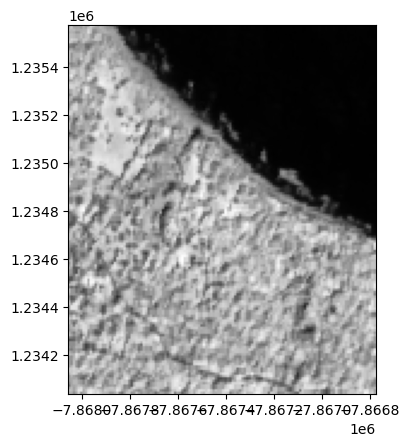

<Axes: >

In [14]:
# Visualización de una banda
rasterio.plot.show((imagen, 5), cmap="Greys_r")

### Visualización de múltiples bandas

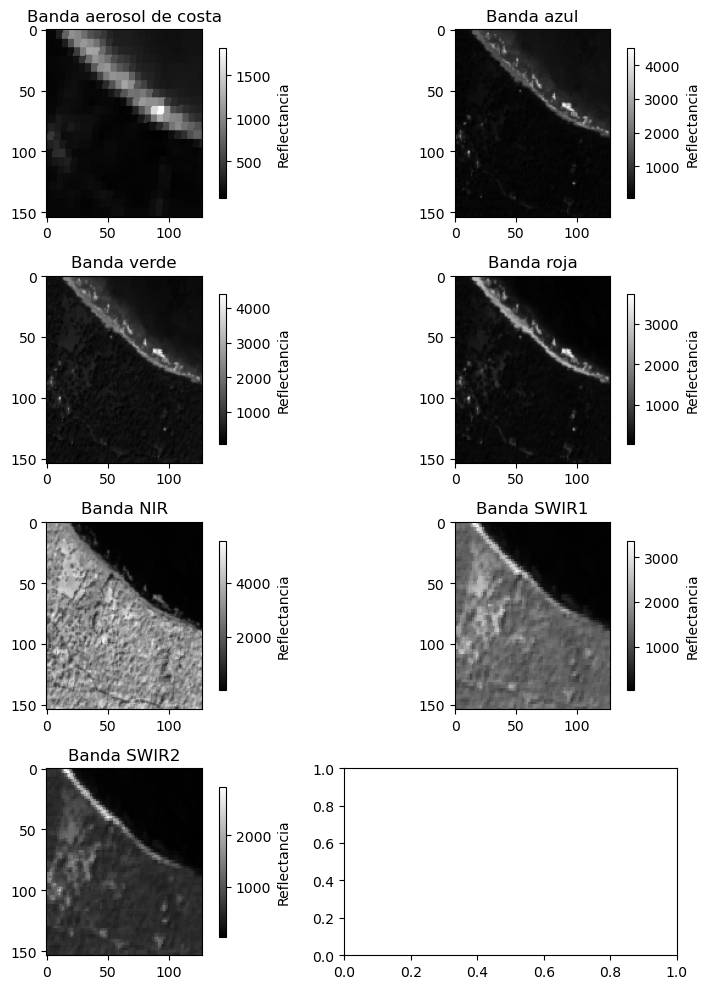

In [15]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(8, 10))
axes = axes.flatten()

for banda in range(1, imagen.count + 1):
    datos = imagen.read(banda)
    ax = axes[banda - 1]
    im = ax.imshow(datos, cmap="gray")
    ax.set_title(f"Banda {nombres_bandas[banda - 1]}")
    fig.colorbar(im, ax=ax, label="Reflectancia", shrink=0.8)

plt.tight_layout()
plt.show()


### Combinación de bandas

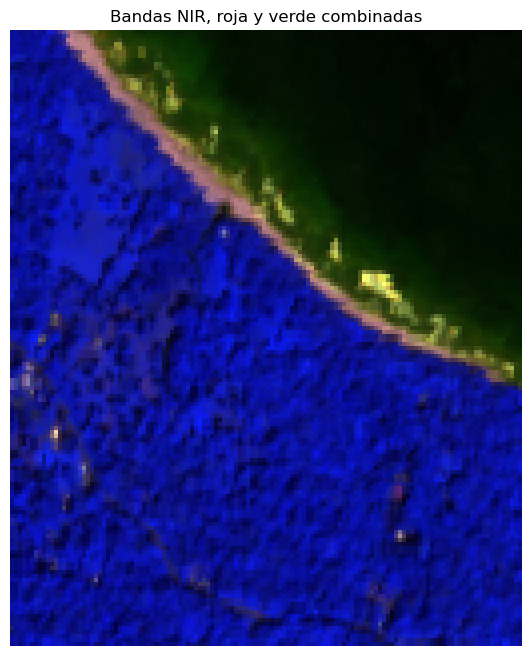

In [16]:
red_band = imagen.read(4).astype('float32')
green_band = imagen.read(3).astype('float32')
nir_band = imagen.read(5).astype('float32')

# Manejar valores NaN
nir_band = np.nan_to_num(nir_band, nan=nir_band.min())
red_band = np.nan_to_num(red_band, nan=red_band.min())
green_band = np.nan_to_num(green_band, nan=green_band.min())

# Normalizar las bandas
nir_norm = (nir_band - nir_band.min()) / (nir_band.max() - nir_band.min())
red_norm = (red_band - red_band.min()) / (red_band.max() - red_band.min())
green_norm = (green_band - green_band.min()) / (green_band.max() - green_band.min())

# Verificar que los valores están entre 0 y 1
nir_norm = nir_norm.clip(0, 1)
red_norm = red_norm.clip(0, 1)
green_norm = green_norm.clip(0, 1)

# Arreglo de bandas
rgb = np.dstack((red_norm, green_norm, nir_norm))

# Mapa
plt.figure(figsize=(8, 8))
plt.imshow(rgb)
plt.title("Bandas NIR, roja y verde combinadas")
plt.axis('off')
plt.show()


### Cálculo del NDVI

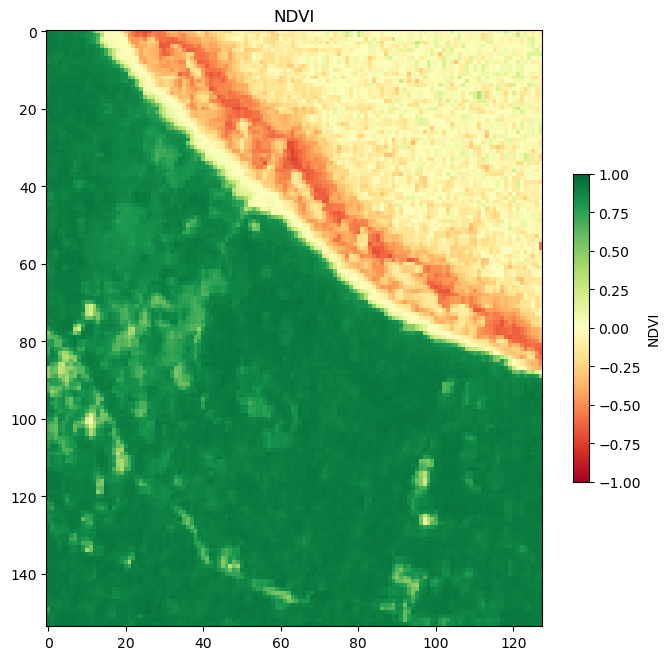

In [17]:
# Cálculo del NDVI: NDVI = (NIR - roja) / (NIR + roja)
ndvi = (nir_band - red_band) / (nir_band + red_band)
ndvi = ndvi.clip(-1, 1)

plt.figure(figsize=(8, 8))
plt.imshow(ndvi, cmap="RdYlGn", vmin=-1, vmax=1)
plt.colorbar(label="NDVI", shrink=0.5)
plt.title("NDVI")
plt.show()

## Recursos de interés

[Colormap reference -- matplotlib documentation](https://matplotlib.org/stable/gallery/color/colormap_reference.html)